# Classification Notebook

In [75]:
# Imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


## Import Dataset

In [76]:
data = pd.read_csv('datasets/small_data_filtered.csv')

#rename text_filtered to text
data.rename(columns = {'text_filtered':'text'}, inplace = True)

## Fit and eval model with input data

In [77]:
def train_test_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    results = {}
    results['accuracy'] = accuracy_score(Y_test, y_pred)
    results['precision'] = precision_score(Y_test, y_pred, average='weighted')
    results['recall'] = recall_score(Y_test, y_pred, average='weighted')
    results['f1'] = f1_score(Y_test, y_pred, average='weighted')
    results['confusion_matrix'] = confusion_matrix(Y_test, y_pred)
    results['model'] = model
    results['y_pred'] = y_pred
    return results

In [78]:
def display_confusion_matrix(matrix):
    # Display the confusion matrix as an image
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(matrix, annot=True, fmt='d', ax=ax)
    
    # Set the labels
    ax.set_xlabel('Predicted', fontsize=20)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_title('Confusion Matrix', fontsize=20)
    plt.show()


## CountVectorizer

In [79]:
def countVectorizerAux(data, ngram_range_max):
    #TODO: change the lowercase
    vectorizer = CountVectorizer(analyzer='word', lowercase=False, stop_words='english', ngram_range=(1, ngram_range_max))
    X = vectorizer.fit_transform(data['text']).toarray()
    y = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    results = {}
    results['X_train'] = X_train
    results['X_test'] = X_test
    results['y_train'] = y_train
    results['y_test'] = y_test
    return results

## TfidfVectorizer

In [80]:
def tfidfVectorizerAux(data, ngram_range_max):
    vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1, ngram_range_max))
    X = vectorizer.fit_transform(data['text']).toarray()
    y = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    results = {}
    results['X_train'] = X_train
    results['X_test'] = X_test
    results['y_train'] = y_train
    results['y_test'] = y_test
    return results

## Results

### CountVectorized

#### NB 

##### Unigram

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.865 0.8662678025755756 0.865 0.8627851316721808
[[39  2  3  1]
 [ 0 49  0  0]
 [ 1  0 40  5]
 [ 4  5  6 45]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

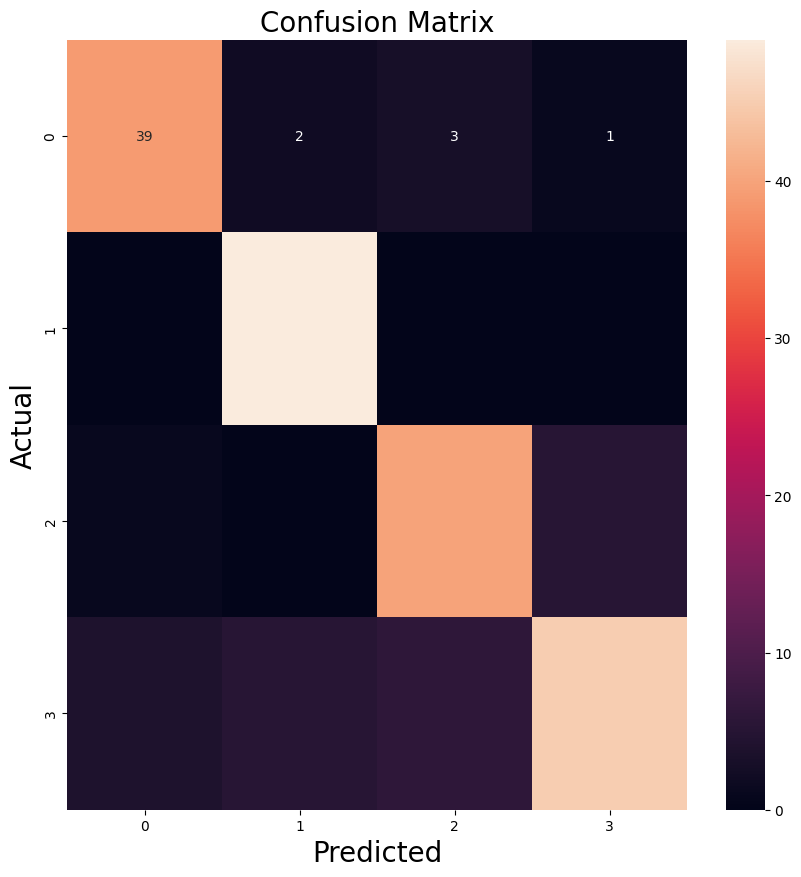

In [81]:
countVectorizerResults = countVectorizerAux(data, 1)
print(countVectorizerResults['X_train'])
results_nb_simple = train_test_model(
    MultinomialNB(), 
    countVectorizerResults['X_train'], 
    countVectorizerResults['y_train'], 
    countVectorizerResults['X_test'], 
    countVectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

##### Bigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

0.845 0.8494162882544322 0.845 0.8447833880044539
[[42  5  6  2]
 [ 1 48  1  1]
 [ 1  1 37  6]
 [ 2  0  5 42]]


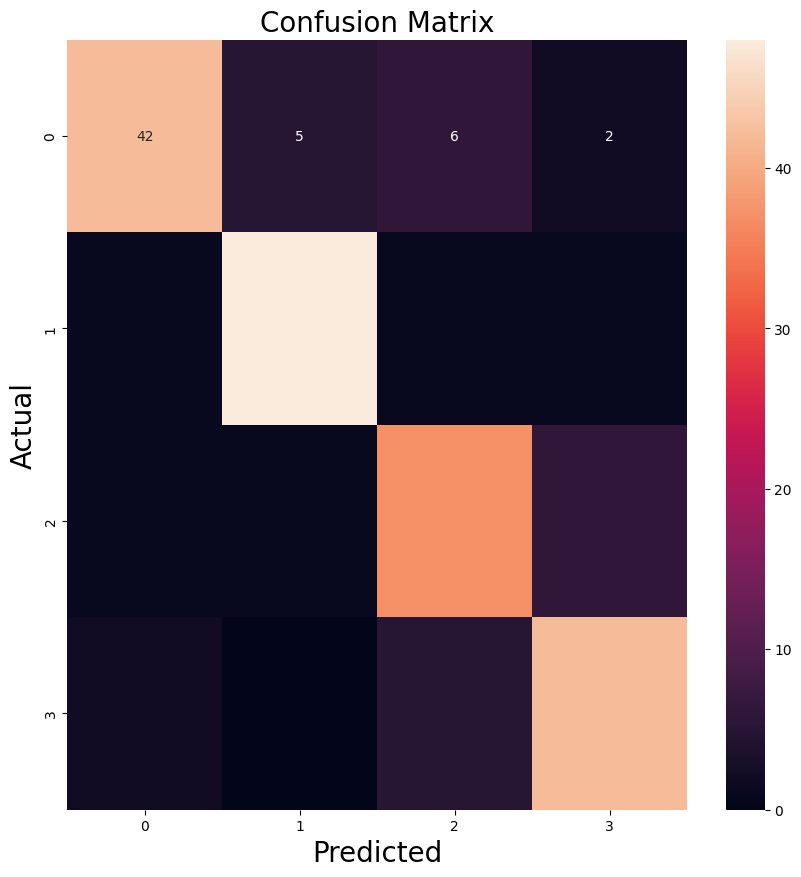

In [82]:
countVectorizerResults = countVectorizerAux(data, 2)
results_nb_simple = train_test_model(
    MultinomialNB(), 
    countVectorizerResults['X_train'], 
    countVectorizerResults['y_train'], 
    countVectorizerResults['X_test'], 
    countVectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

##### Trigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

0.855 0.8573610142883752 0.855 0.8551257908757909
[[32  1  3  1]
 [ 1 57  0  0]
 [ 5  1 36  5]
 [ 2  0 10 46]]


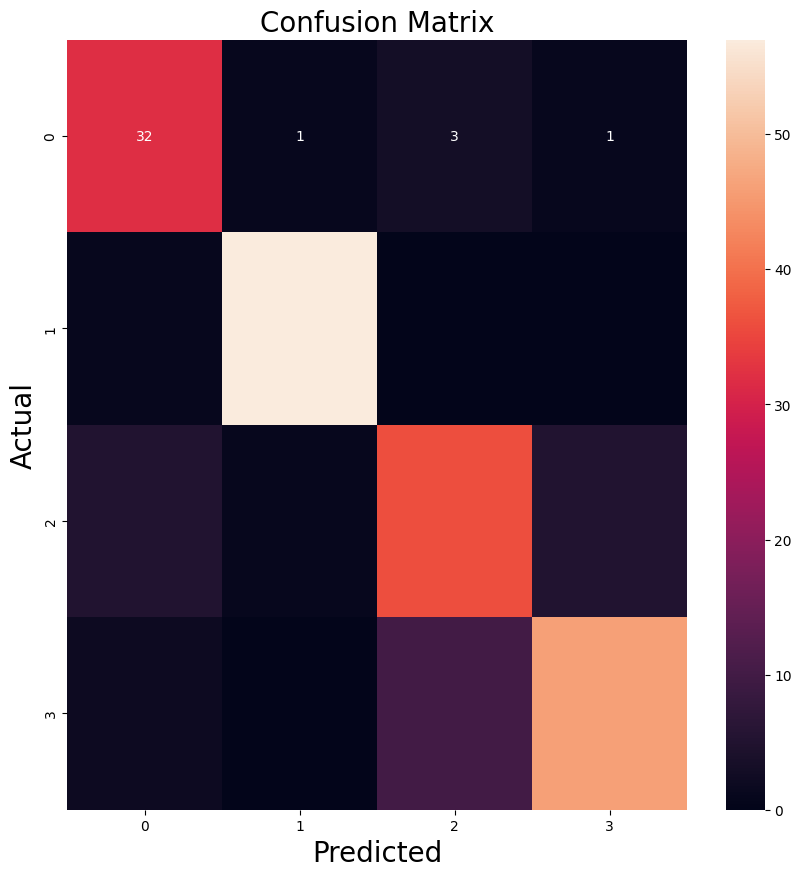

In [83]:
countVectorizerResults = countVectorizerAux(data, 3)
results_nb_simple = train_test_model(
    MultinomialNB(), 
    countVectorizerResults['X_train'], 
    countVectorizerResults['y_train'], 
    countVectorizerResults['X_test'], 
    countVectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

#### DTC

##### Unigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.53 0.5819220622059199 0.53 0.528781351796748
[[26 12  9  3]
 [ 2 35  6  2]
 [ 4 19 28  6]
 [ 2 20  9 17]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

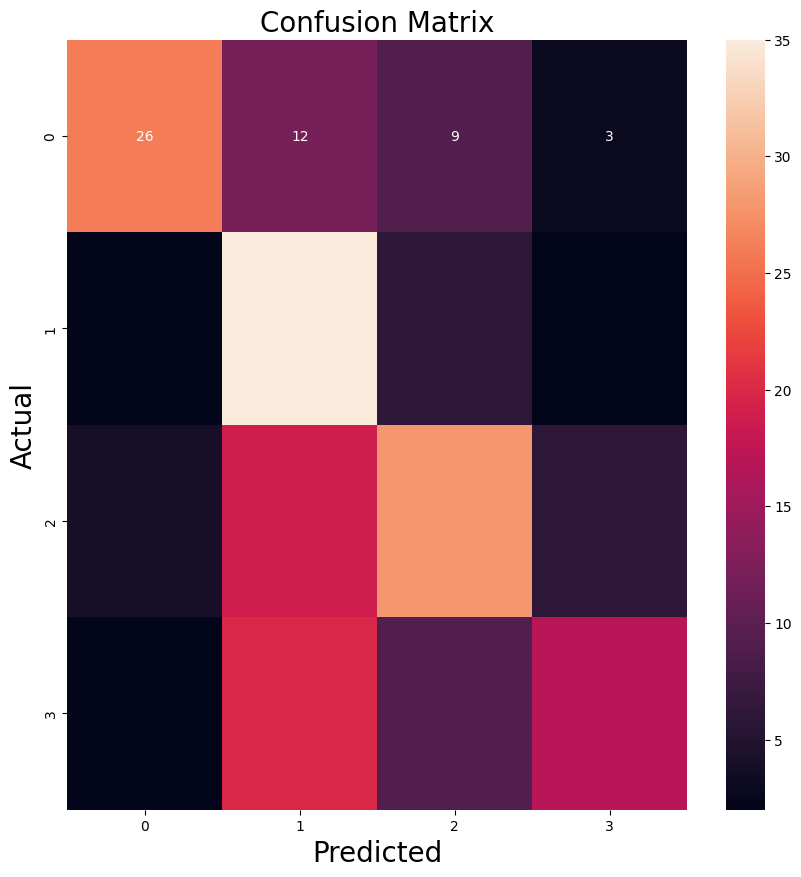

In [84]:
vectorizerResults = countVectorizerAux(data, 1)
results_nb_simple = train_test_model(
    DecisionTreeClassifier(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

##### Bigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.66 0.6734509768899112 0.66 0.664107522578343
[[28  2  5 10]
 [ 3 45  2 10]
 [ 6  2 30 10]
 [ 4  8  6 29]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

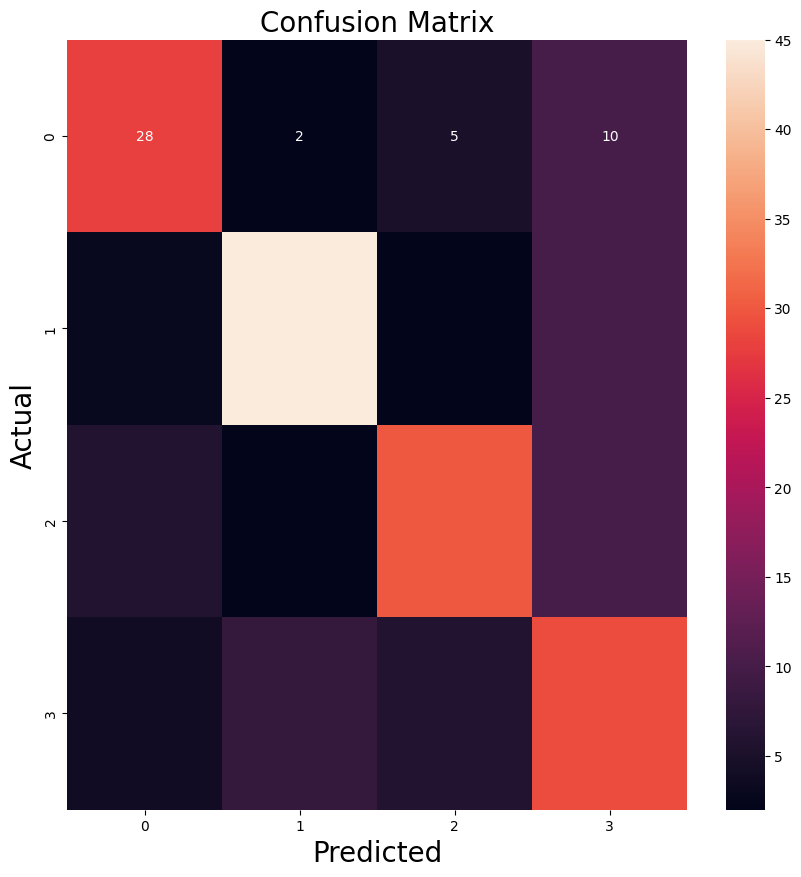

In [85]:
vectorizerResults = countVectorizerAux(data, 2)
results_nb_simple = train_test_model(
    DecisionTreeClassifier(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

##### Trigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.59 0.6163000460193281 0.59 0.597186507936508
[[29  3  5 10]
 [ 2 40  3 14]
 [ 6  5 23 15]
 [ 4  5 10 26]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

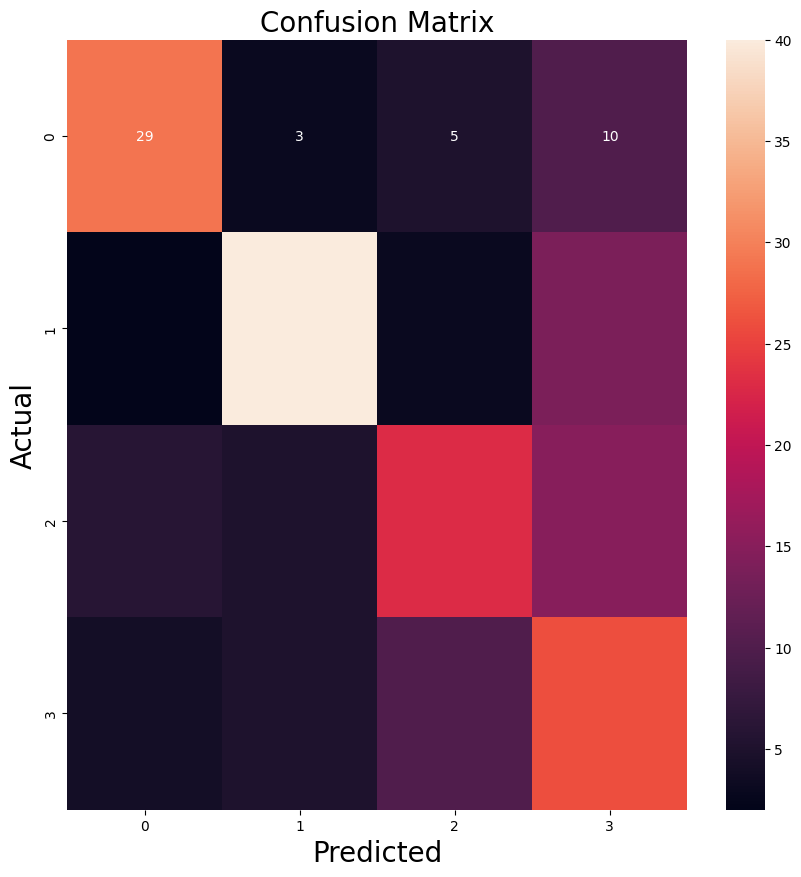

In [86]:
vectorizerResults = countVectorizerAux(data, 3)
results_nb_simple = train_test_model(
    DecisionTreeClassifier(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

### TFIDF Vectorizerd

#### NB

##### Unigram

0.88 0.8858154761904763 0.88 0.8799070585018035
[[39  1  3  0]
 [ 0 54  1  0]
 [ 1  2 45  4]
 [ 0  2 10 38]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

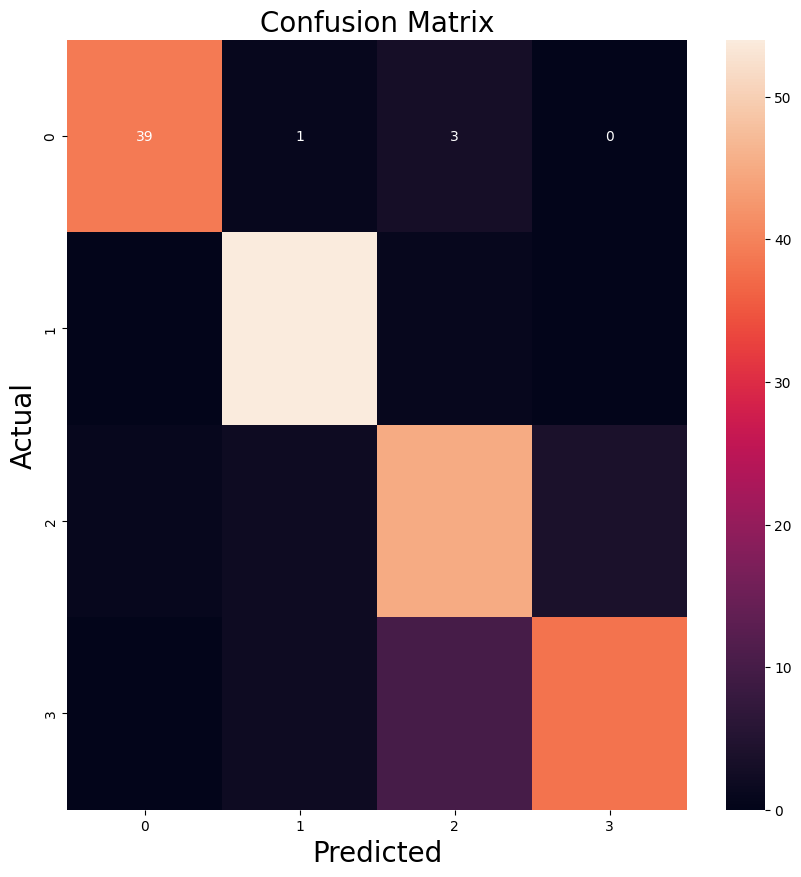

In [87]:
vectorizerResults = tfidfVectorizerAux(data, 1)
results_nb_simple = train_test_model(
    MultinomialNB(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

##### Bigram

0.83 0.8384302920359247 0.83 0.8326485138506657
[[42  1  5  4]
 [ 1 57  2  2]
 [ 3  1 36  6]
 [ 0  1  8 31]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

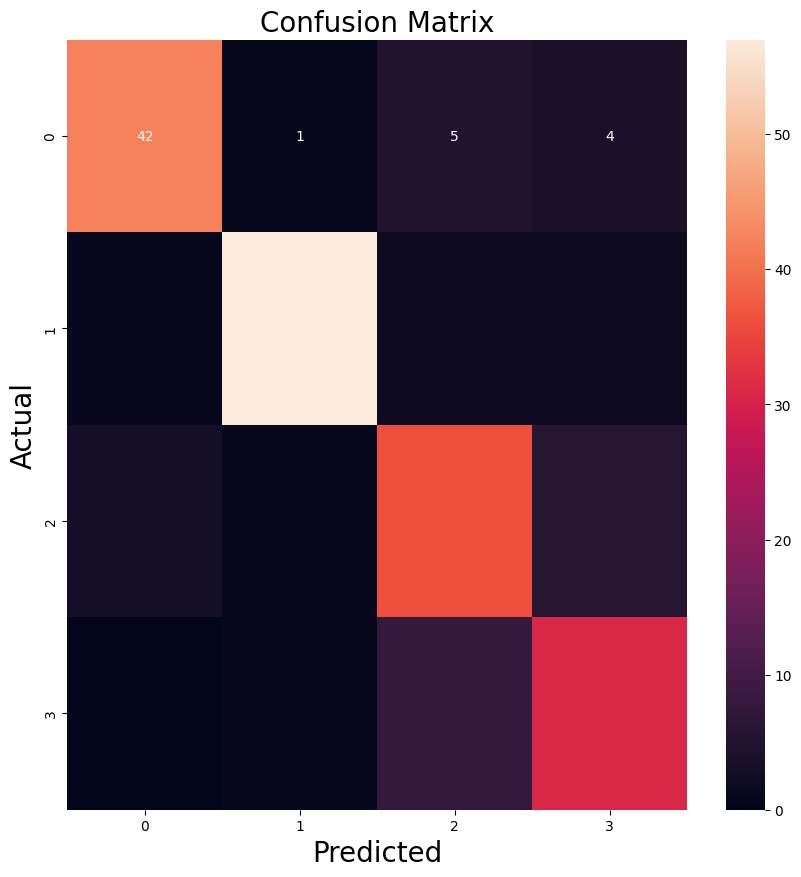

In [88]:
vectorizerResults = tfidfVectorizerAux(data, 2)
results_nb_simple = train_test_model(
    MultinomialNB(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

##### Trigram

0.8 0.8172955486542444 0.8 0.7978816014124209
[[38  6  6  2]
 [ 0 44  0  0]
 [ 1  2 38  4]
 [ 3  4 12 40]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

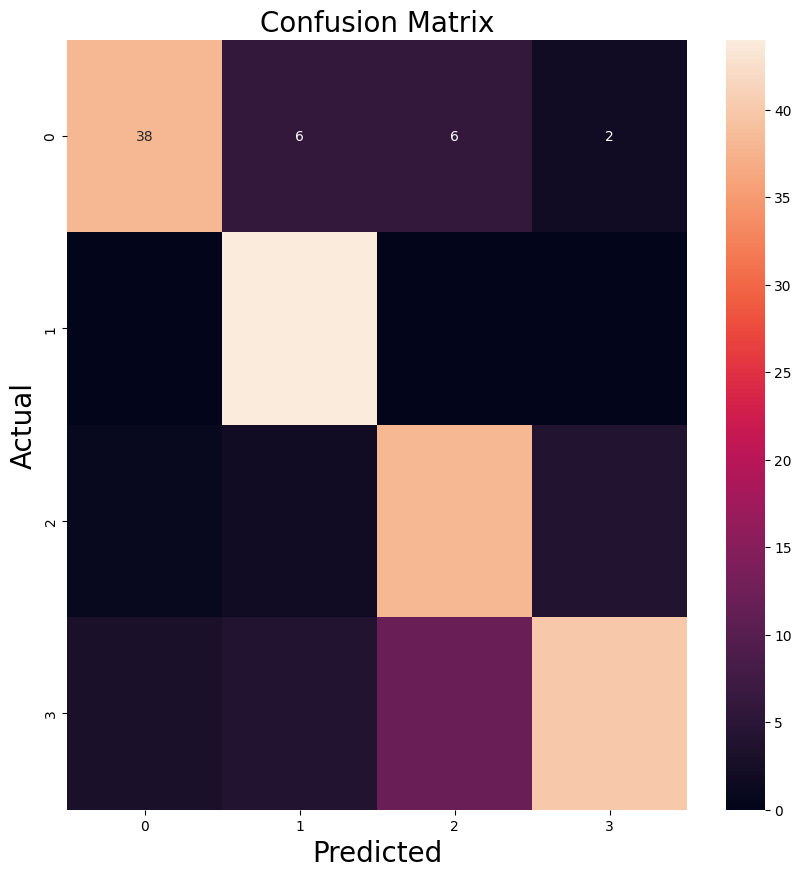

In [89]:
vectorizerResults = tfidfVectorizerAux(data, 3)
results_nb_simple = train_test_model(
    MultinomialNB(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

### DTC

#### Unigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.615 0.6273780436783533 0.615 0.614235578798479
[[33  1  4 10]
 [ 6 30  3  7]
 [ 7  3 21 18]
 [ 5  3 10 39]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

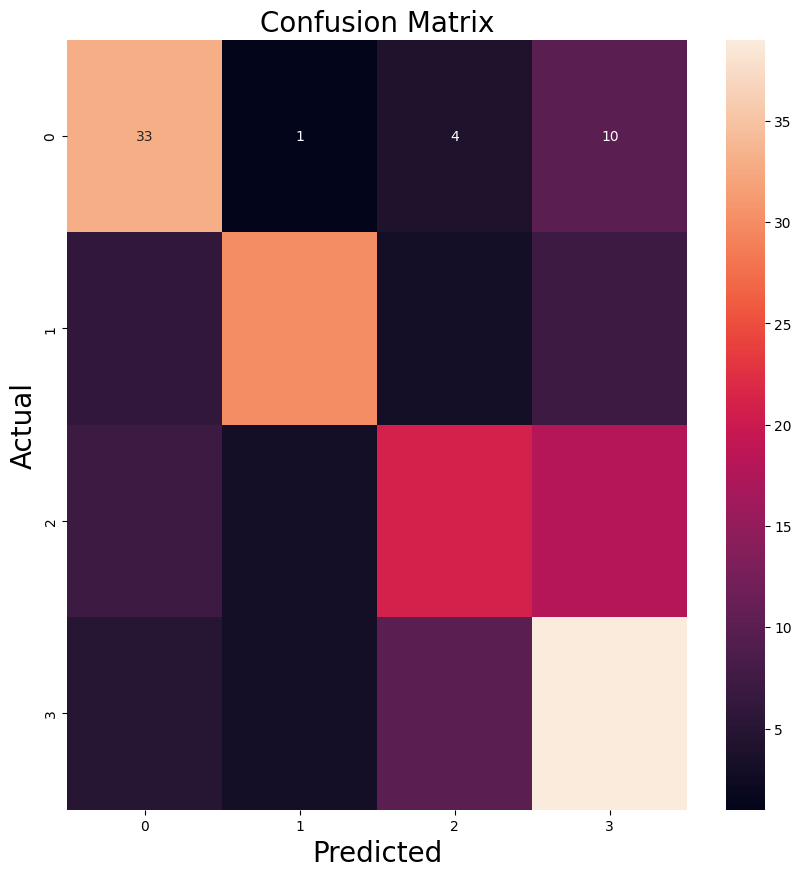

In [90]:
vectorizerResults = tfidfVectorizerAux(data, 1)
results_nb_simple = train_test_model(
    DecisionTreeClassifier(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

#### Bigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.58 0.5776869565217391 0.58 0.5783041958041958
[[25  2  6 11]
 [ 7 32  0  3]
 [ 6  3 29 16]
 [ 6  9 15 30]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

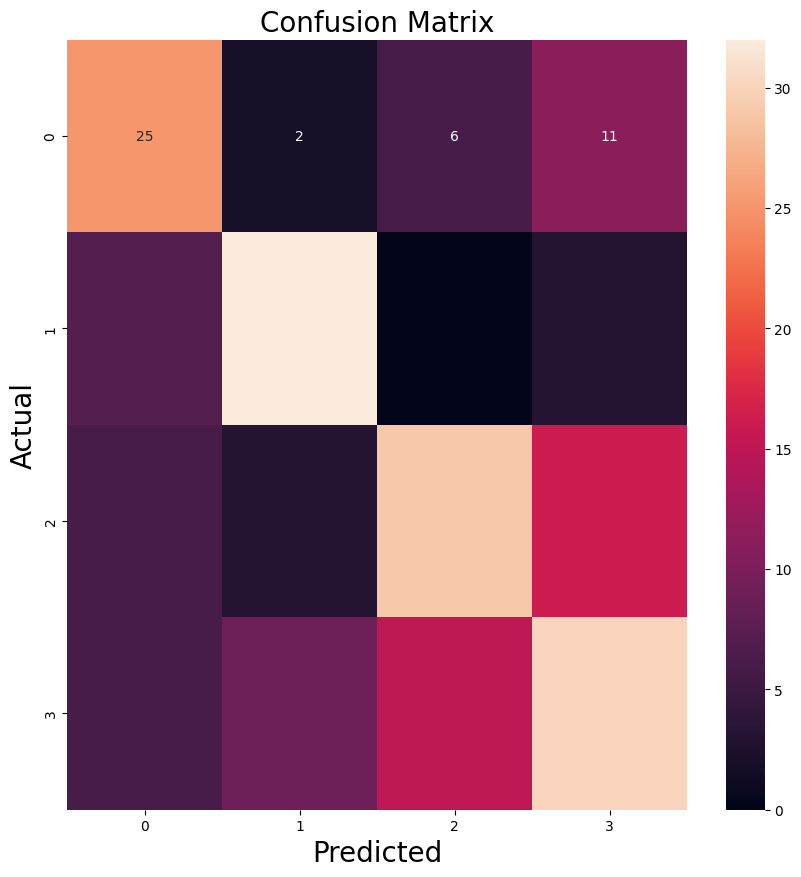

In [91]:
vectorizerResults = tfidfVectorizerAux(data, 2)
results_nb_simple = train_test_model(
    DecisionTreeClassifier(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])

#### Trigram

/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.605 0.6014933880528957 0.605 0.6030659584588552
[[31  2  5  4]
 [ 4 36  2 10]
 [ 3  4 31 14]
 [ 5 12 14 23]]


/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/lucas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

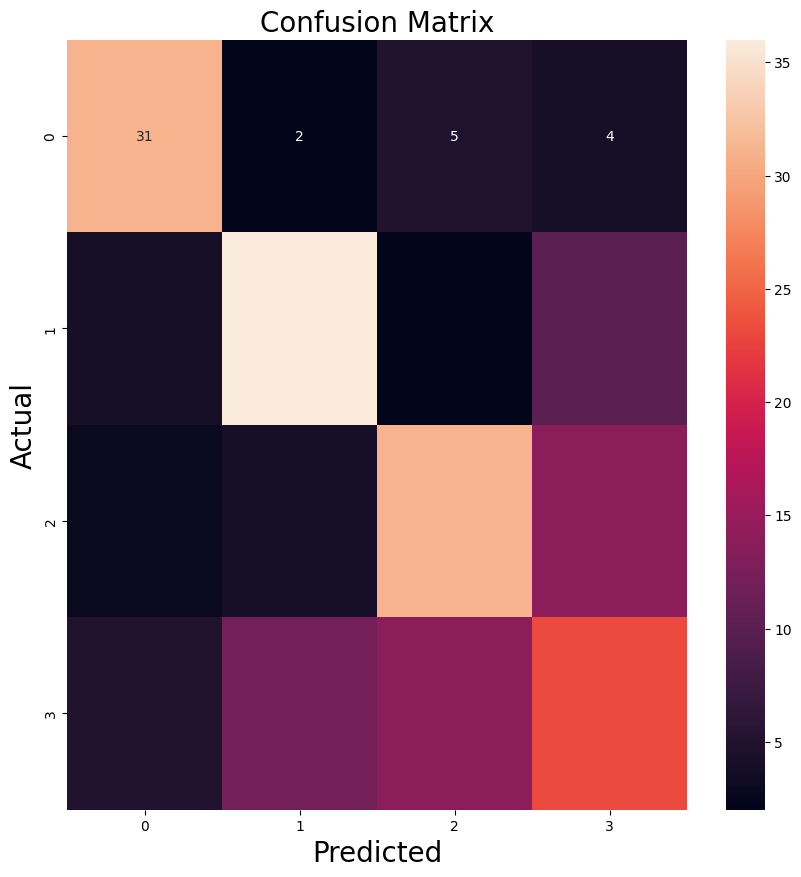

In [92]:
vectorizerResults = tfidfVectorizerAux(data, 3)
results_nb_simple = train_test_model(
    DecisionTreeClassifier(), 
    vectorizerResults['X_train'], 
    vectorizerResults['y_train'], 
    vectorizerResults['X_test'], 
    vectorizerResults['y_test'],
    )
print(results_nb_simple['accuracy'], results_nb_simple['precision'], results_nb_simple['recall'], results_nb_simple['f1'])
print(results_nb_simple['confusion_matrix'])
display_confusion_matrix(results_nb_simple['confusion_matrix'])